In [93]:
import numpy as np
import pandas as pd
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import matplotlib.pyplot as plt
import seaborn as sns

## __1 - Business Problem__  
___Recommend a best book based on the ratings___  

## __2 - Data collection and description__ 

In [2]:
df = pd.read_csv("C:/Users/SohailShaikh/Downloads/book_r.csv", encoding = "ISO-8859-1")

In [3]:
df1 = df.iloc[:,1:]

In [4]:
df1.columns = ['userID', 'title', 'bookRating']

In [5]:
df1.head()

,userID,title,bookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [60]:
print('# of records: %d\n# of books: %d\n# of users: %d' % (len(df1), len(df1['title'].unique()), len(df1['userID'].unique())))

# of ratings: 10000
# of books: 9659
# of users: 2182


In [94]:
palette = sns.color_palette("RdBu", 10)

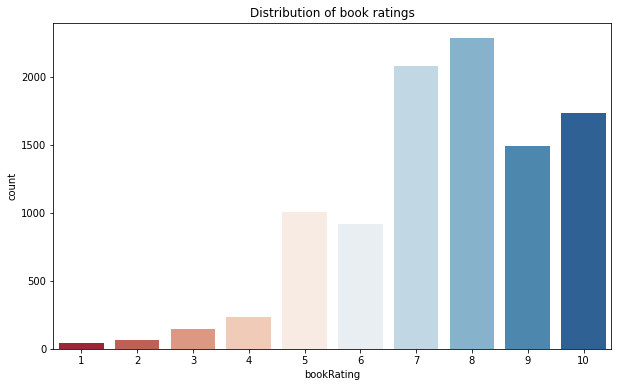

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='bookRating', data=df1, palette=palette)
ax.set_title('Distribution of book ratings')

plt.show()

### The majority of ratings is between 5 and 10. Most often users tend to rate books for 8. Second the most frequent score is 7.

## __3 - Introduction to "Surprice" Package__ 

In [6]:
df1.bookRating.unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [7]:
reader = surprise.Reader(rating_scale=(1, 10))

In [8]:
data = surprise.Dataset.load_from_df(df1[['userID', 'title', 'bookRating']], reader)

In [34]:
trainset, testset = train_test_split(data, test_size=.20)

## __4 - Finding the best algorithm for our Recommendation System__ 

In [54]:
benchmark = []

In [58]:
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [59]:
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,1.683263,0.320146,0.012334
SVDpp,1.685689,3.374272,0.019650
BaselineOnly,1.705030,0.016447,0.013452
KNNBaseline,1.706391,0.062013,0.017200
KNNWithMeans,1.818221,0.059677,0.033885
SlopeOne,1.821594,0.739765,0.019016
KNNBasic,1.823789,0.043674,0.015667
CoClustering,1.857463,0.654241,0.012689
NMF,1.902435,0.730445,0.014203


### SVD () algorithm gave us the best rmse, therefore, we will train and predict with SVD

## __5 - Building our Recommendation System using surprice__ 

In [35]:
algo = SVD()

In [36]:
algo.fit(trainset)

In [37]:
predictions = algo.test(testset)

In [41]:
accuracy.rmse(predictions, verbose=True)

RMSE: 1.6820


1.6819885041847213

In [61]:
def recommendation(userID):
    user = df1.copy()
    already_read = df1[df1['userID'] == userID]['title'].unique()
    user = user.reset_index()
    user = user[~user['title'].isin(already_read)]
    user['Estimate_Score']=user['title'].apply(lambda x: algo.predict(userID, x).est)
    #user = user.drop('title', axis = 1)
    user = user.sort_values('Estimate_Score', ascending=False)
    print(user.head(10))

## __6 - Building our Recommendation System using correlation__ 

In [64]:
rating = pd.pivot_table(df1, index='userID', values='bookRating', columns='title', fill_value=0)

In [65]:
corr = np.corrcoef(each_book_rating.T)

In [66]:
corr.shape

(9659, 9659)

In [67]:
book_list=  list(rating)

In [68]:
book_titles =[] 

In [69]:
for i in range(len(book_list)):
    book_titles.append(book_list[i])

In [70]:
book_titles

[' Jason, Madison &amp',
 ' Other Stories;Merril;1985;McClelland &amp',
 ' Repairing PC Drives &amp',
 "'48",
 "'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities",
 '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
 '01-01-00: A Novel of the Millennium',
 '1,401 More Things That P*Ss Me Off',
 '10 Commandments Of Dating',
 '100 Great Fantasy Short, Short Stories',
 '1001 Brilliant Ways to Checkmate',
 '101 Bright Ideas: Esl Activities for All Ages',
 '101 Dalmatians',
 '101 Essential Tips: House Plants',
 '101 Telephone Jokes',
 '101 Wacky Computer Jokes',
 '101 Ways to Make Money at Home',
 '11 Edward Street',
 '11th Hour',
 '13 99 Euros',
 '14,000 Things to Be Happy About',
 '1984',
 '1st to Die: A Novel',
 '20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.',
 '20 Years of Censored News',
 '20,000 Leagues Under the Sea (Wordsworth Collection)',
 '20,001 Names for Baby',
 '2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 

In [77]:
def get_recommendation(books_list):
    book_similarities = np.zeros(corr.shape[0])
    
    for book in books_list:
        book_index = book_titles.index(book)
        book_similarities += corr[book_index] 
        book_preferences = []
    for i in range(len(book_titles)):
        book_preferences.append((book_titles[i],book_similarities[i]))
        
    return sorted(book_preferences, key= lambda x: x[1], reverse=True)

## __7 - Conclusion__ 

In [62]:
recommendation(276747)

      index  userID                                              title  \
6763   6763    3538                                           The Gift   
3898   3898    1309                                           The Gift   
5372   5372    2288                       Weirdos From Another Planet!   
2428   2428      53                                          Reliquary   
5585   5585    2442                                        Fora de joc   
2475   2475     125  The Nature of Good and Evil (Journey of the So...   
2769   2769     382                                        Three Fates   
4359   4359    1733       Cuentos Para Pensar / Stories To Think About   
6217   6217    3142  The Bachman Books: Rage, the Long Walk, Roadwo...   
4275   4275    1725  The Bachman Books: Rage, the Long Walk, Roadwo...   

      bookRating  Estimate_Score  
6763          10        8.394758  
3898          10        8.394758  
5372          10        8.351891  
2428          10        8.306728  
5585      

### You can enter any User ID and get the recommendation and estimated score

In [73]:
my_fav_books = ['Classical Mythology','Clara Callan']

In [85]:
print('The books you might like: \n' , get_recommendation(my_fav_books)[:10])

The books you might like: 
 [('Clara Callan', 0.9995414947271893), ('Classical Mythology', 0.9995414947271893), ('Decision in Normandy', 0.9995414947271893), ('Artemisia: A Novel', -0.0009170105456212565), ('Cathedral (Vintage Contemporaries (Paperback))', -0.0009170105456212565), ('Clear Springs : A Family Story', -0.0009170105456212565), ('Cry Me a River', -0.0009170105456212565), ('Durable Goods', -0.0009170105456212565), ("Fancy Strut (Ballantine Reader's Circle)", -0.0009170105456212565), ("How We Die: Reflections on Life's Final Chapter", -0.0009170105456212565)]


### You can enter your favourite book and get the recommendation on what might like